In [12]:
# Tạo trang R trên colab: https://colab.research.google.com/notebook#create=true&language=r
a <- 5
b <- 7
c <- a + b

In [13]:
fruit <- c("a",'b','c')

In [14]:
print(fruit)

[1] "a" "b" "c"


In [15]:
print(c)

[1] 12


In [16]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
library(rpart)

In [18]:
print(summary(iris))

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


In [19]:
print(head(iris))

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


In [20]:
set.seed(42)
trainingRowIndex=sample(1:nrow(iris), 0.7*nrow(iris))
print("Select training row indexes:")
print(trainingRowIndex)
trainingData=iris[trainingRowIndex,]
testData=iris[-trainingRowIndex,]
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Select training row indexes:"
  [1]  49  65  74 146 122 150 128  47  24  71 100  89 110  20 114 111 131  41
 [19] 139  27 109   5  84  34  92 104   3  58  97  42 142  30  43  15  22 123
 [37]   8  36  68  86  18 130 126  69   4  98  50  99  88  87 145  26   6 105
 [55]   2 124  21  96 115  10  40 129  33 140  73  29  76   9  35  16 107  93
 [73] 120 138  80  55  90  94  57 121  77  13  53  54  32  60  85  17  44  83
 [91]  72 135 118 149  48 136  64  38   1 144  14 132  61  81 103
[1] "Rows of training data and test data:"
[1] 105
[1] 45


In [21]:
iris.tree=rpart(Species~Sepal.Length +Sepal.Width +Petal.Length+Petal.Width, data=trainingData, method="class")

In [22]:
iris.tree

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 67 setosa (0.36190476 0.33333333 0.30476190)  
  2) Petal.Length< 2.35 38  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.35 67 32 versicolor (0.00000000 0.52238806 0.47761194)  
    6) Petal.Width< 1.65 37  3 versicolor (0.00000000 0.91891892 0.08108108) *
    7) Petal.Width>=1.65 30  1 virginica (0.00000000 0.03333333 0.96666667) *

In [23]:
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



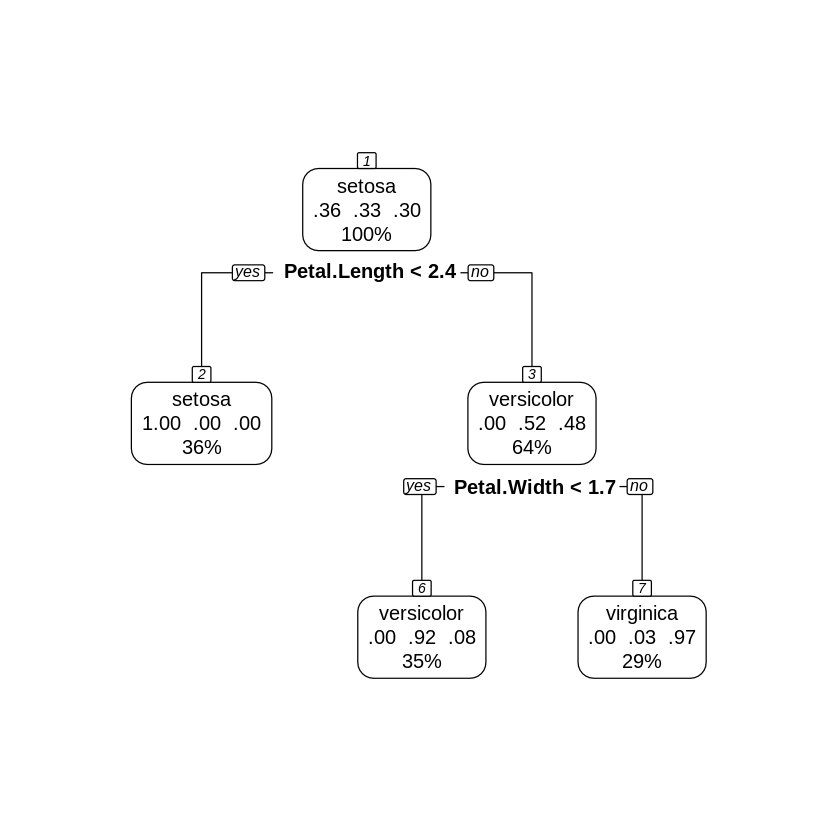

In [25]:
prp(iris.tree, type=2, extra="auto", nn=TRUE, branch=1, varlen=0, yesno=2)

In [27]:
y_pred=predict(iris.tree, testData, type="class")

In [29]:
result=table(y_pred, testData$Species)
result

            
y_pred       setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         14         1
  virginica       0          1        17

In [30]:
acc=sum(diag(result))/sum(result)
acc

[1] 0.9555556

In [32]:
new_cases=iris[c(1,10,100,140),]

In [33]:
new_cases$Species=NULL
print(new_cases)

    Sepal.Length Sepal.Width Petal.Length Petal.Width
1            5.1         3.5          1.4         0.2
10           4.9         3.1          1.5         0.1
100          5.7         2.8          4.1         1.3
140          6.9         3.1          5.4         2.1


In [34]:
print("New predictions:")
pred_new=predict(iris.tree, new_cases, type="class")
print(pred_new)

[1] "New predictions:"
         1         10        100        140 
    setosa     setosa versicolor  virginica 
Levels: setosa versicolor virginica


In [37]:
tree.gre=rpart(Petal.Length~Petal.Width,data=trainingData)
tree.gre

n= 105 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 105 329.5819000 3.619048  
   2) Petal.Width< 0.8 38   0.7147368 1.447368 *
   3) Petal.Width>=0.8 67  48.0074600 4.850746  
     6) Petal.Width< 1.55 33  10.2024200 4.215152  
      12) Petal.Width< 1.35 20   3.3400000 3.900000 *
      13) Petal.Width>=1.35 13   1.8200000 4.700000 *
     7) Petal.Width>=1.55 34  11.5344100 5.467647 *

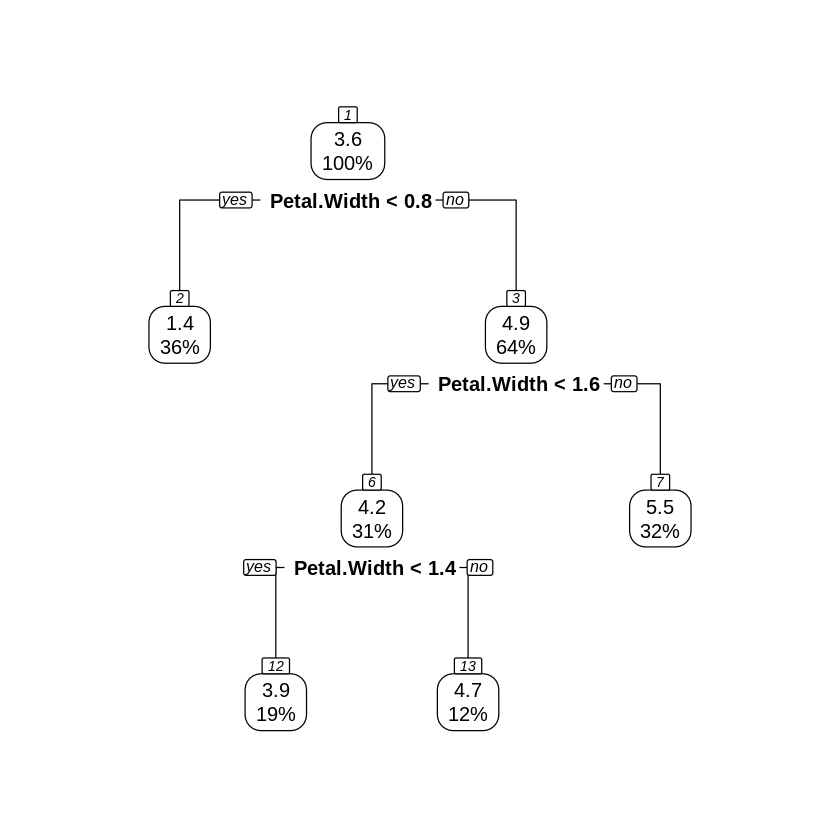

In [38]:
prp(tree.gre, type=2, extra="auto", nn=TRUE, branch=1, varlen=0, yesno=2)

In [39]:
install.packages("rattle")
install.packages("RColorBrewer")
library("rattle")
library("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



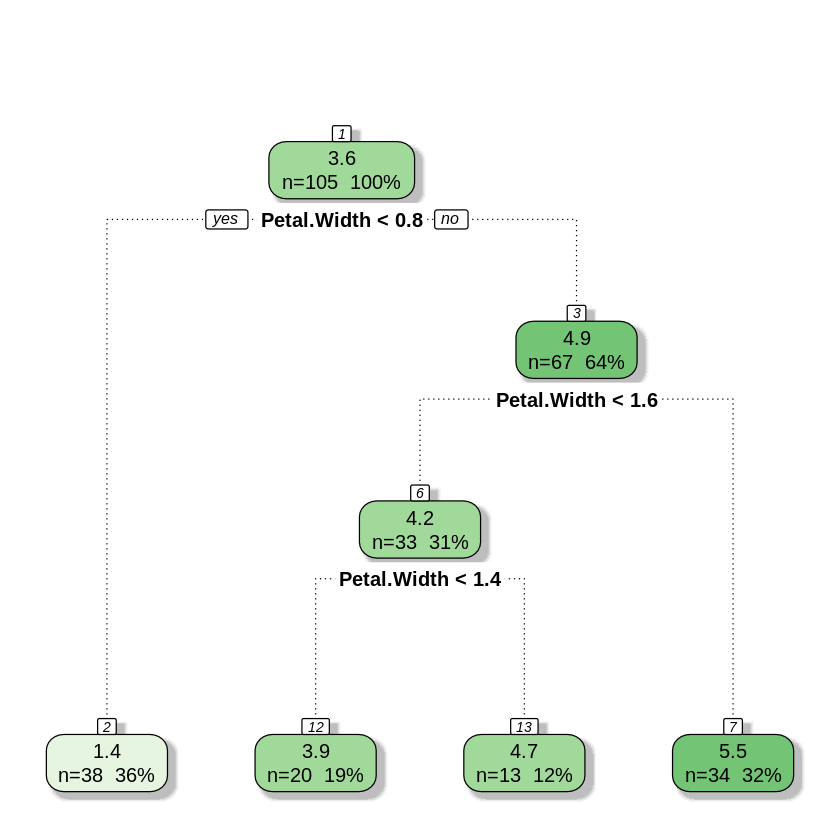

In [40]:
fancyRpartPlot(tree.gre, caption=NULL)

In [41]:
now=data.frame(Petal.Width=c(0.25,1.25,2.25))
predict_new=predict(tree.gre,now)
predict_new

1        2        3 
1.447368 3.900000 5.467647